In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
# 载入数据

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

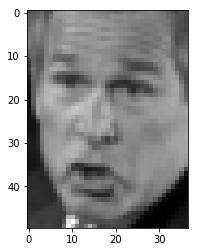

In [3]:
plt.imshow(lfw_people.images[6],cmap='gray')
plt.show()

In [4]:
# 照片的数据格式
n_samples, h, w = lfw_people.images.shape
print(n_samples)
print(h)
print(w)

1288
50
37


In [5]:
lfw_people.data.shape

(1288, 1850)

In [6]:
lfw_people.target

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [7]:
target_names = lfw_people.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [8]:
n_classes = lfw_people.target_names.shape[0]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target)

In [10]:
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        21
     Colin Powell       0.19      1.00      0.32        62
  Donald Rumsfeld       0.00      0.00      0.00        24
    George W Bush       0.00      0.00      0.00       136
Gerhard Schroeder       0.00      0.00      0.00        24
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        40

      avg / total       0.04      0.19      0.06       322



F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# PCA降维

In [12]:
# 100个维度
n_components = 100

pca = PCA(n_components=n_components, whiten=True).fit(lfw_people.data)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [13]:
x_train_pca.shape

(966, 100)

In [14]:
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
predictions = model.predict(x_test_pca)
print(classification_report(y_test, predictions, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.67      0.80        21
     Colin Powell       0.79      0.92      0.85        62
  Donald Rumsfeld       0.82      0.75      0.78        24
    George W Bush       0.88      0.96      0.92       136
Gerhard Schroeder       0.83      0.83      0.83        24
      Hugo Chavez       1.00      0.73      0.85        15
       Tony Blair       0.94      0.75      0.83        40

      avg / total       0.88      0.87      0.87       322



# 调参

In [16]:
param_grid = {'C': [0.1, 1, 5, 10, 100],
              'gamma': [0.0005, 0.001, 0.005, 0.01], }
model = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
model.fit(x_train_pca, y_train)
print(model.best_estimator_)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [17]:
predictions = model.predict(x_test_pca)
print(classification_report(y_test, predictions, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.86      0.77        21
     Colin Powell       0.87      0.87      0.87        62
  Donald Rumsfeld       0.73      0.79      0.76        24
    George W Bush       0.95      0.92      0.94       136
Gerhard Schroeder       0.78      0.88      0.82        24
      Hugo Chavez       0.81      0.87      0.84        15
       Tony Blair       0.97      0.82      0.89        40

      avg / total       0.89      0.88      0.88       322



In [23]:
param_grid = {'C': [0.1, 0.6, 1, 2, 3],
              'gamma': [0.003, 0.004, 0.005, 0.006, 0.007], }
model = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
model.fit(x_train_pca, y_train)
print(model.best_estimator_)

SVC(C=3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.007, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [24]:
predictions = model.predict(x_test_pca)
print(classification_report(y_test, predictions, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.71      0.77        21
     Colin Powell       0.86      0.90      0.88        62
  Donald Rumsfeld       0.83      0.79      0.81        24
    George W Bush       0.90      0.98      0.94       136
Gerhard Schroeder       0.86      0.79      0.83        24
      Hugo Chavez       0.92      0.80      0.86        15
       Tony Blair       0.94      0.78      0.85        40

      avg / total       0.89      0.89      0.88       322



# 画图

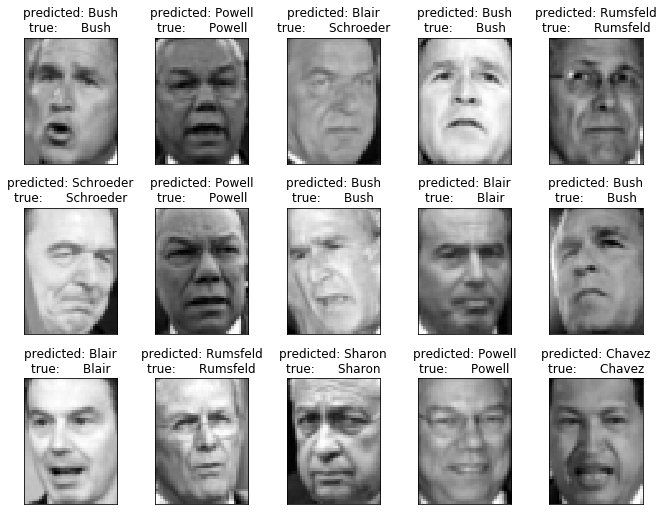

In [38]:
# 画图，3行4列
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# 获取一张图片title
def title(predictions, y_test, target_names, i):
    pred_name = target_names[predictions[i]].split(' ')[-1]
    true_name = target_names[y_test[i]].split(' ')[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

# 获取所有图片title
prediction_titles = [title(predictions, y_test, target_names, i) for i in range(len(predictions))]

# 画图
plot_gallery(x_test, prediction_titles, h, w)

plt.show()